In [1]:
import pandas as pd
import numpy as np

# Preparing dataset

In [2]:
np.random.seed(42)
X=np.random.rand(100,1) -0.5
y=3*X[:,0]**2 + 0.05 * np.random.randn(100)

In [3]:
df = pd.DataFrame()
df['X'] = X.reshape(100)
df['y'] = y
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


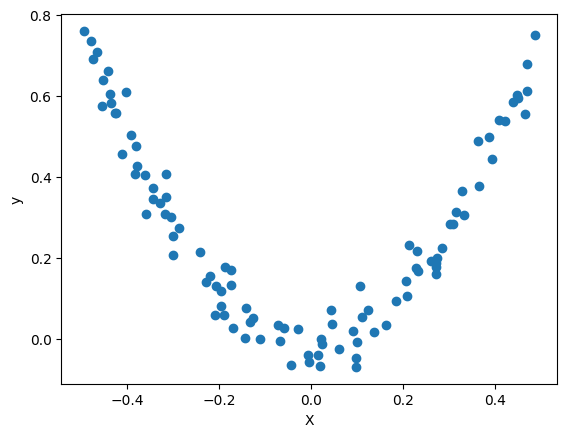

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['X'],df['y'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# 1st Model

In [5]:
df['pred1'] = df['y'].mean()
df.head()

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458


In [6]:
df['res1'] = df['y'] - df['pred1']
df.head()

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


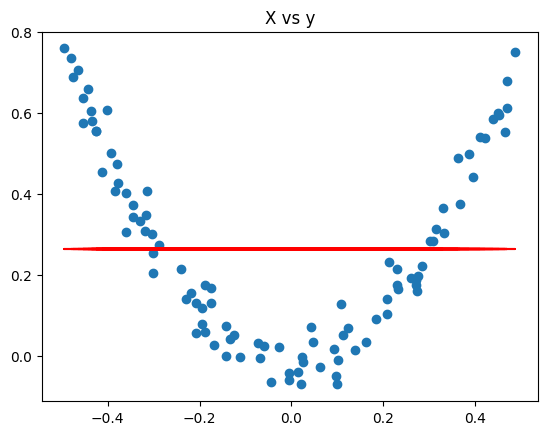

In [7]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'], df['pred1'], color='red')
plt.title('X vs y')
plt.show()

# 2nd Model

Training

[Text(0.4090909090909091, 0.9166666666666666, 'x[0] <= -0.36\nsquared_error = 0.056\nsamples = 100\nvalue = 0.0'),
 Text(0.18181818181818182, 0.75, 'x[0] <= -0.43\nsquared_error = 0.012\nsamples = 18\nvalue = 0.309'),
 Text(0.29545454545454547, 0.8333333333333333, 'True  '),
 Text(0.09090909090909091, 0.5833333333333334, 'squared_error = 0.004\nsamples = 9\nvalue = 0.395'),
 Text(0.2727272727272727, 0.5833333333333334, 'squared_error = 0.005\nsamples = 9\nvalue = 0.222'),
 Text(0.6363636363636364, 0.75, 'x[0] <= 0.322\nsquared_error = 0.04\nsamples = 82\nvalue = -0.068'),
 Text(0.5227272727272727, 0.8333333333333333, '  False'),
 Text(0.45454545454545453, 0.5833333333333334, 'x[0] <= -0.235\nsquared_error = 0.016\nsamples = 67\nvalue = -0.142'),
 Text(0.36363636363636365, 0.4166666666666667, 'squared_error = 0.003\nsamples = 12\nvalue = 0.041'),
 Text(0.5454545454545454, 0.4166666666666667, 'x[0] <= 0.211\nsquared_error = 0.009\nsamples = 55\nvalue = -0.182'),
 Text(0.45454545454545453

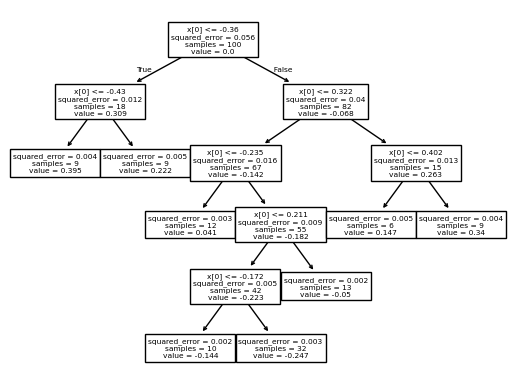

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df['X'].values.reshape(100,1) , df['res1'].values)
plot_tree(tree2)

Testing

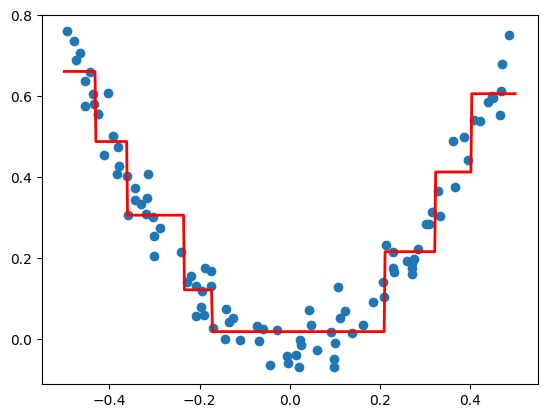

In [9]:
X_test = np.linspace(-0.5,0.5,500)

y_pred = df['pred1'][0] + tree2.predict(X_test.reshape(500,1))

plt.plot(X_test , y_pred , linewidth=2 , color = 'red')
plt.scatter(df['X'],df['y'])

In [10]:
df['pred2'] = df['pred1'][0] + tree2.predict(df['X'].values.reshape(100,1)) 
df['res2'] = df['y'] - df['pred2']
df.head()

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320,0.033253
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018320,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305965,0.038021


# 3rd Model

In [11]:
tree3 = DecisionTreeRegressor(max_leaf_nodes=8)
tree3.fit(df['X'].values.reshape(100,1), df['res2'])
# plot_tree(tree3)

DecisionTreeRegressor(max_leaf_nodes=8)

Testing model 3

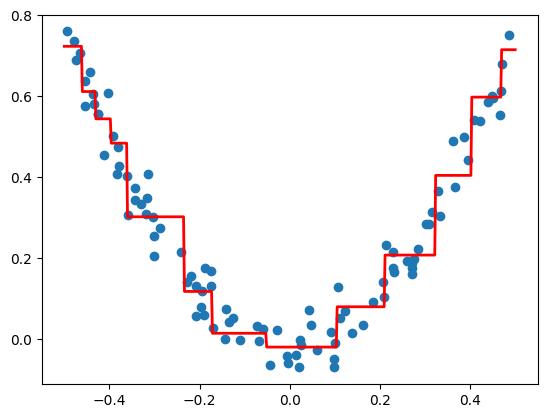

In [12]:
X_test = np.linspace(-0.5,0.5,500)

y_pred = df['pred1'][0] + tree2.predict(X_test.reshape(500,1)) + tree3.predict(X_test.reshape(500,1))

plt.plot(X_test , y_pred , linewidth=2 , color = 'red')
plt.scatter(df['X'],df['y'])

In [16]:
df['pred3'] = df['pred1'][0] + tree2.predict(df['X'].values.reshape(100,1))  + tree3.predict(df['X'].values.reshape(100,1))
df['res3'] = df['y'] - df['pred3']
df.head()

,X,y,pred1,res1,pred2,res2,pred3,res3
0,-0.125460,0.051573,0.265458,-0.213885,0.018320,0.033253,0.014321,0.037252
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404,0.597523,-0.003043
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732,0.207423,-0.041371
3,0.098658,-0.070178,0.265458,-0.335636,0.018320,-0.088497,-0.019811,-0.050367
4,-0.343981,0.343986,0.265458,0.078528,0.305965,0.038021,0.301966,0.042020


# Final Prediction